## FFTのplot例

以下はデータの読み込み処理.
example_plot_time_seriesと同様です.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("./5_5_4_06_freq_250kHz_div_ch1_TB58.csv")
print(df)

        Record Length         1024   Points           0.0  23.01029968  \
0     Sample Interval  2.4414064E3       Hz  2.441406e+03      20.6103   
1       Trigger Point          0.0  Samples  4.882813e+03      -3.7897   
2                 NaN          NaN      NaN  7.324219e+03     -28.9897   
3                 NaN          NaN      NaN  9.765625e+03     -34.9897   
4                 NaN          NaN      NaN  1.220703e+04     -36.9897   
...               ...          ...      ...           ...          ...   
1018              NaN          NaN      NaN  2.487793e+06     -45.7897   
1019              NaN          NaN      NaN  2.490234e+06     -42.9897   
1020              NaN          NaN      NaN  2.492676e+06     -46.9897   
1021              NaN          NaN      NaN  2.495117e+06     -46.9897   
1022              NaN          NaN      NaN  2.497558e+06     -46.9897   

      Unnamed: 5  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

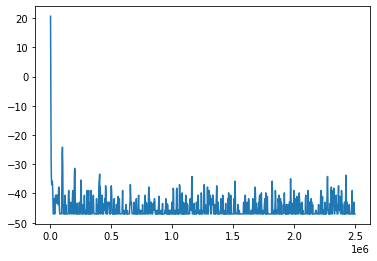

In [4]:
data = np.array(df)
x = data[:, 3]
y = data[:, 4]
plt.plot(x, y)

このままだと, x軸の1e6はおかしいので, x軸の単位をHzではなく, MHzにする

グラフにデコレーションを足す.

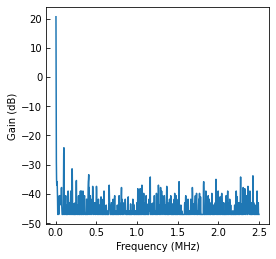

In [5]:
data = np.array(df)
x = data[:, 3] * 10**-6
y = data[:, 4]

fig, ax = plt.subplots(figsize=(4, 4))
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')

ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Gain (dB)")

ax.plot(x, y)

例えば, 以上のグラフから100 kHzの付近をみたい場合, まず100 kHzは配列データの何番目かを探す関数を作る.

In [6]:
def find_value(value, array):
    for i in range(len(array)):
        if array[i] > value:
            return i

data = np.array(df)
x = data[:, 3]
print(find_value(100*10**3, x))

40


100 kHzは40番目のデータなので, 100 kHzを中心(index=40)に30~50番目のデータをプロットする.
データの切り取りに関して, numpyのsliceを使う.
配列sliceの参照仕方はnumpyのapi referenceをみてください.
https://numpy.org/doc/stable/user/basics.indexing.html


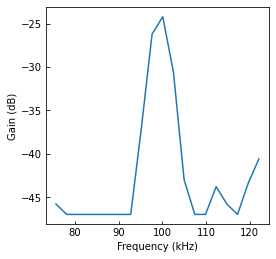

In [8]:
data = np.array(df)
x = data[:, 3][30:50] / 1000
y = data[:, 4][30:50]

fig, ax = plt.subplots(figsize=(4, 4))
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')

ax.set_xlabel("Frequency (kHz)")
ax.set_ylabel("Gain (dB)")

ax.plot(x, y)